# <center>Pinhole Camera Image Formation</center>

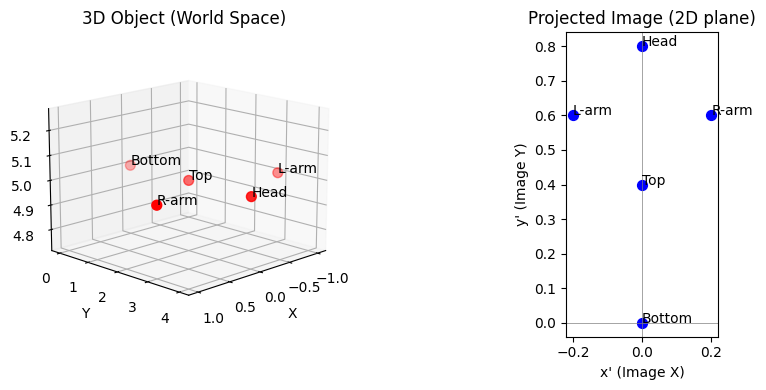

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define 3D points of a simple "object" (stick figure)
object_points = np.array([
    [0, 0, 5],    # body bottom
    [0, 2, 5],    # body top
    [-1, 3, 5],   # left arm
    [1, 3, 5],    # right arm
    [0, 4, 5],    # head top
])

# Pinhole camera model parameters
focal_length = 1  # distance from pinhole to image plane

# Project 3D points onto 2D image plane using pinhole projection
def pinhole_projection(points, f):
    x = f * points[:, 0] / points[:, 2]
    y = f * points[:, 1] / points[:, 2]
    return np.column_stack((x, y))

image_points = pinhole_projection(object_points, focal_length)

# Plot original 3D points (world space)
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(object_points[:,0], object_points[:,1], object_points[:,2], c='r', s=50)
for i, txt in enumerate(["Bottom", "Top", "L-arm", "R-arm", "Head"]):
    ax1.text(object_points[i,0], object_points[i,1], object_points[i,2], txt)
ax1.set_title("3D Object (World Space)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(15, 45)

# Plot projected 2D image points (image plane)
ax2 = fig.add_subplot(122)
ax2.scatter(image_points[:,0], image_points[:,1], c='b', s=50)
for i, txt in enumerate(["Bottom", "Top", "L-arm", "R-arm", "Head"]):
    ax2.text(image_points[i,0], image_points[i,1], txt)
ax2.set_title("Projected Image (2D plane)")
ax2.set_xlabel("x' (Image X)")
ax2.set_ylabel("y' (Image Y)")
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()